In [2]:
import pandas as pd

In [3]:
pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [6]:
# split dataset in features and target variable
feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose', 'BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols]
y = pima.Outcome

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
print(X_train)

     Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  \
762            9        0  22.5   33       89             62   
127            1       94  33.3   23      118             58   
564            0        0  32.4   27       91             80   
375           12      325  39.2   58      140             82   
663            9      130  37.9   40      145             80   
..           ...      ...   ...  ...      ...            ...   
763           10      180  32.9   63      101             76   
192            7        0  30.4   36      159             66   
629            4        0  24.7   21       94             65   
559           11        0  30.1   35       85             74   
684            5        0   0.0   69      136             82   

     DiabetesPedigreeFunction  
762                     0.142  
127                     0.261  
564                     0.601  
375                     0.528  
663                     0.637  
..                        ...  
763    

In [9]:
print(X_test)

     Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  \
661            1        0  42.9   22      199             76   
122            2      100  33.6   23      107             74   
113            4        0  34.0   25       76             62   
14             5      175  25.8   51      166             72   
529            0        0  24.6   31      111             65   
..           ...      ...   ...  ...      ...            ...   
366            6        0  27.6   29      124             72   
301            2      135  31.6   25      144             58   
382            1      182  25.4   21      109             60   
140            3        0  21.1   55      128             78   
463            5        0  27.6   37       88             78   

     DiabetesPedigreeFunction  
661                     1.394  
122                     0.404  
113                     0.391  
14                      0.587  
529                     0.660  
..                        ...  
366    

In [10]:
# import the class
from sklearn.linear_model import LogisticRegression

In [11]:
# instantiate the model 
logreg = LogisticRegression()

In [12]:
# fit the model with data
logreg.fit(X_train,y_train)

C:\Users\Riya Gaur\Anaconda3\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_pred = logreg.predict(X_test)

In [14]:
print(y_test)

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64


In [15]:
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
# import the metrics class
from sklearn import metrics

In [18]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

In [19]:
cnf_matrix

array([[117,  13],
       [ 24,  38]], dtype=int64)

Text(6.800000000000008, 0.5, 'Predicted Label')

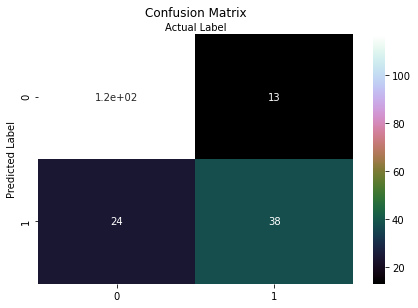

In [25]:
class_names = [0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
print
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='cubehelix' )
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')